<a href="https://colab.research.google.com/github/MariaGabrielaAlvesZuppardo/SeriesTemporaisCin/blob/main/ModeloHolt_HoltWinters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
pip install pandas matplotlib seaborn yfinance statsmodels

In [88]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error



### Carregando Base de Dados da Apple

In [89]:
# 1. Obter a série temporal de USD/BRL (Dólar/Real) com yfinance
# Usaremos a taxa de câmbio do Dólar contra o Real
serie_cambio = yf.download('USDBRL=X', start='2007-03-18', end='2025-03-18', interval='1d')

# 2. Usar a coluna 'Close' (preço de fechamento) e ajustar a frequência para mensal
serie_cambio_mensal = serie_cambio['Close'].resample('ME').last()
print(serie_cambio_mensal)

[*********************100%***********************]  1 of 1 completed

Ticker      USDBRL=X
Date                
2007-03-31    2.0550
2007-04-30    2.0279
2007-05-31    1.9191
2007-06-30    1.9276
2007-07-31    1.8655
...              ...
2024-11-30    6.0139
2024-12-31    6.1779
2025-01-31    5.8745
2025-02-28    5.8390
2025-03-31    5.7406

[217 rows x 1 columns]


In [90]:
# 3. Tratar valores NaN (preenchendo ou removendo)
serie_cambio_mensal = serie_cambio_mensal.dropna()

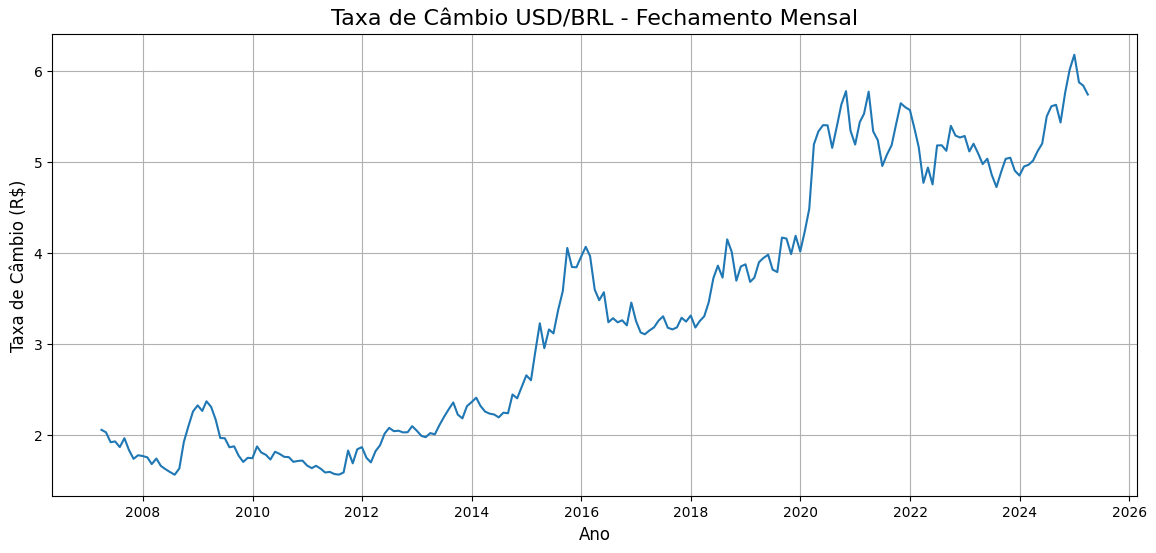

In [91]:
# 4. Visualizar os dados ajustados
plt.figure(figsize=(14, 6))
plt.plot(serie_cambio_mensal)
plt.title('Taxa de Câmbio USD/BRL - Fechamento Mensal', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Taxa de Câmbio (R$)', fontsize=12)
plt.grid(True)
plt.show()

### Treino e Teste dos dados:

In [92]:
# Separação 70% treino e 30% teste
# Preencher valores NaN com interpolação linear

tamanho = int(len(serie_cambio_mensal) * 0.7)
train = serie_cambio_mensal[:tamanho]
test = serie_cambio_mensal[tamanho:]

# Verificação
print(f'Tamanho total: {len(serie_mensal)}')
print(f'Treino: {len(train)} meses')
print(f'Teste: {len(test)} meses')




Tamanho total: 217
Treino: 151 meses
Teste: 66 meses


### Modelo Holt- Winters

In [94]:
# 6. Holt-Winters (Exponential Smoothing)
# Ajustando o modelo Holt-Winters
modelo_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
previsao_hw = modelo_hw.forecast(len(test))

### Modelo Holt (Exponential Smoothing sem sazonalidade)

In [96]:
# Ajustando o modelo Holt
modelo_holt = ExponentialSmoothing(train, trend='add', seasonal=None).fit()
previsao_holt = modelo_holt.forecast(len(test))

### Métricas de Avaliação

In [97]:
# 8. Cálculo das métricas
# MAPE e MSE para Holt-Winters
mape_hw = mean_absolute_percentage_error(test, previsao_hw) * 100
mse_hw = mean_squared_error(test, previsao_hw)

# MAPE e MSE para Holt
mape_holt = mean_absolute_percentage_error(test, previsao_holt) * 100
mse_holt = mean_squared_error(test, previsao_holt)

# 9. Exibir os resultados
print(f'Holt-Winters - MAPE: {mape_hw:.2f}% | MSE: {mse_hw:.2f}')
print(f'Holt - MAPE: {mape_holt:.2f}% | MSE: {mse_holt:.2f}')

Holt-Winters - MAPE: 12.08% | MSE: 0.58
Holt - MAPE: 11.03% | MSE: 0.51


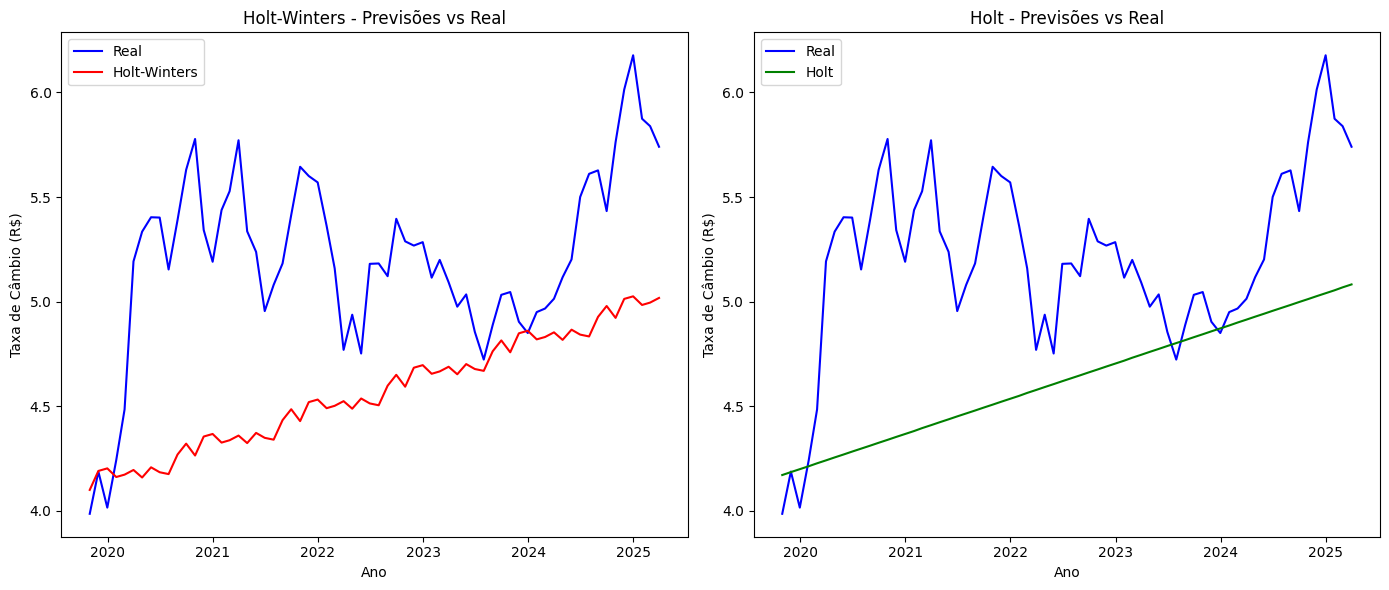

In [98]:
# 10. Plotando os gráficos das previsões
plt.figure(figsize=(14, 6))

# Gráfico para Holt-Winters
plt.subplot(1, 2, 1)
plt.plot(test.index, test, label='Real', color='blue')
plt.plot(test.index, previsao_hw, label='Holt-Winters', color='red')
plt.title('Holt-Winters - Previsões vs Real')
plt.xlabel('Ano')
plt.ylabel('Taxa de Câmbio (R$)')
plt.legend()

# Gráfico para Holt
plt.subplot(1, 2, 2)
plt.plot(test.index, test, label='Real', color='blue')
plt.plot(test.index, previsao_holt, label='Holt', color='green')
plt.title('Holt - Previsões vs Real')
plt.xlabel('Ano')
plt.ylabel('Taxa de Câmbio (R$)')
plt.legend()

plt.tight_layout()
plt.show()

In [99]:
import ipywidgets as widgets
from IPython.display import display

In [100]:
# 6. Checkboxes interativos
checkbox_hw = widgets.Checkbox(value=True, description='Mostrar Holt-Winters')
checkbox_holt = widgets.Checkbox(value=True, description='Mostrar Holt')

def plotar_modelos(show_hw, show_holt):
    plt.figure(figsize=(12, 5))

    if show_hw:
        plt.plot(test.index, previsao_hw, label='Previsão Holt-Winters', color='red')
    if show_holt:
        plt.plot(test.index, previsao_holt, label='Previsão Holt', color='green')

    # Sempre mostrar os valores reais
    plt.plot(test.index, test, label='Valor Real', color='blue')
    plt.title('Comparação de Previsões')
    plt.xlabel('Ano')
    plt.ylabel('Taxa de Câmbio (R$)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 7. Vincular widgets ao gráfico
widgets.interact(plotar_modelos, show_hw=checkbox_hw, show_holt=checkbox_holt)

interactive(children=(Checkbox(value=True, description='Mostrar Holt-Winters'), Checkbox(value=True, descripti…

<function __main__.plotar_modelos(show_hw, show_holt)>